In [2]:
# Assuming papers is your DataFrame and 'abstract' is the column containing abstracts
# tokenized_sentences_abstract = [sentence.split() for sentence in papers['abstract'].values]

# Example and Output
example_abstract = "This is an example abstract. It contains multiple sentences. Each sentence needs to be tokenized."
print("Example Abstract:", example_abstract)

# Tokenized sentences
tokenized_example_abstract = [sentence.split() for sentence in example_abstract.split('.')]
print("Tokenized Sentences:", tokenized_example_abstract)

Example Abstract: This is an example abstract. It contains multiple sentences. Each sentence needs to be tokenized.
Tokenized Sentences: [['This', 'is', 'an', 'example', 'abstract'], ['It', 'contains', 'multiple', 'sentences'], ['Each', 'sentence', 'needs', 'to', 'be', 'tokenized'], []]


In [149]:
from ydata_profiling import ProfileReport

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [5]:
df = pd.read_csv("./materials/OnlineRetail.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [153]:
df.shape

(541909, 8)

In [154]:
# # Sủ dụng thư viện pandas profiling để xem thông tin dữ liệu
# profile = ProfileReport(df, title='OnlineRetail data')
# profile

# 1. Xử lí cơ bản

### Xử lí null và duplicated

In [155]:
# Xử lí dữ liệu trùng
df.duplicated().any()

True

In [156]:
df.duplicated().sum()

5268

In [157]:
df_no_duplicate = df.drop_duplicates()


In [158]:
df_no_duplicate.duplicated().any()

False

In [159]:
df_no_duplicate.shape

(536641, 8)

In [160]:
# Xử lí dữ liệu null
df_no_duplicate.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [161]:
# Description, CustomerID không thuộc nhóm dữ liệu trong việc analyst segmentation nên không cần xử lí null, tuy nhiên có thể gán giá trị 

df_no_duplicate['Description'] = df_no_duplicate['Description'].fillna("Unknown")
df_no_duplicate['CustomerID'] = df_no_duplicate['CustomerID'].fillna(0)

In [162]:
df_no_duplicate.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Xử lí cột Unit Price

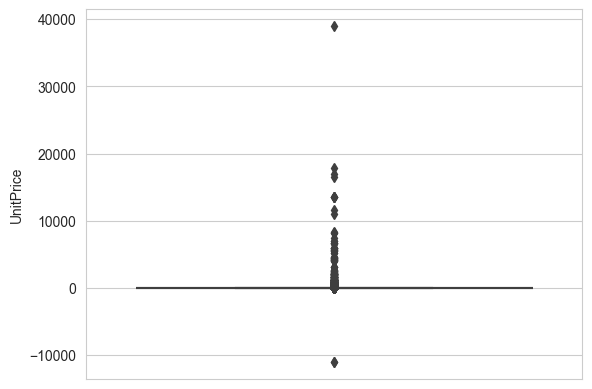

In [163]:
sns.boxplot(y = 'UnitPrice', data=df_no_duplicate)
plt.savefig('./plots/Unit Price process.png')

In [164]:
# Kiểm tra vị trí
df_no_duplicate[df_no_duplicate['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,0.0,United Kingdom


Nhận xét: Có vị trí UnitPrice bị âm, do đó cần loại bỏ dữ liệu âm này. Tuy nhiên dữ liệu này sẽ được loại bỏ trong quá trình xử lí InvoiceNo

### Xử lí dữ liệu cột Description

In [165]:

df_no_duplicate[df_no_duplicate['Description'].str.contains('debt', case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,12-08-2011 14:50,11062.06,0.0,United Kingdom
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,0.0,United Kingdom


Dữ liệu Description có chứa Debt, vì trong analyst không cần thiết phải có debt => cần loại bỏ. Tuy nhiên dữ liệu này sẽ được loại bỏ trong quá trình xử lí InvoiceNo

### Xử lí dữ liệu cột Quantity

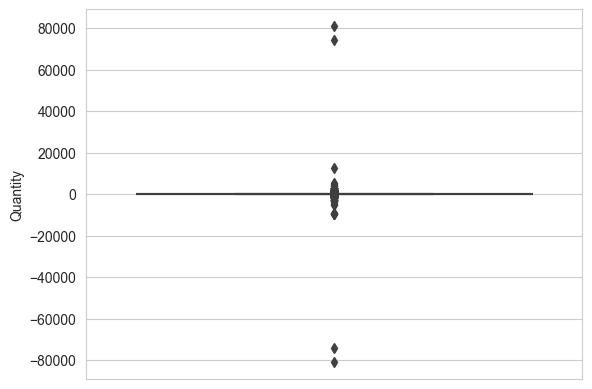

In [166]:
sns.boxplot(y = 'Quantity', data=df_no_duplicate)
plt.savefig('./plots/Quantity process.png')

In [167]:
df_no_duplicate[df_no_duplicate['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


Nhận xét: Dữ liệu Quantity có thể bị âm => cần phải loại bỏ.  Tuy nhiên dữ liệu này sẽ được loại bỏ trong quá trình xử lí InvoiceNo

### Xử lí dữ liệu cột InvoiceNo

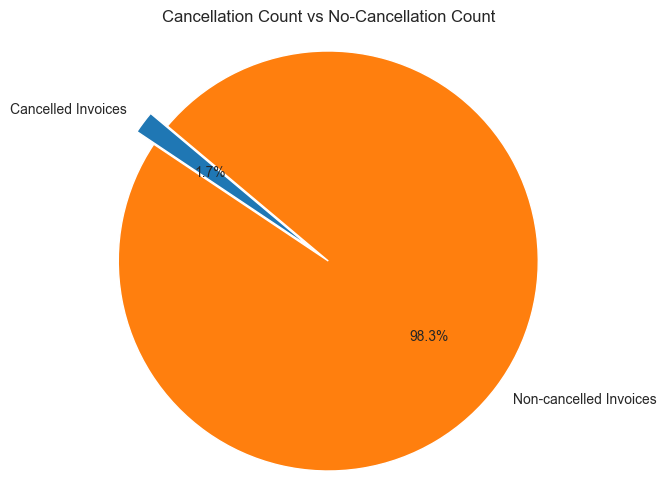

In [168]:
# Biểu đồ pie chart phân bố Cancellation và no-Cancellation (Dựa trên cột InvoiceNo)
cancellation_count = df_no_duplicate[df_no_duplicate['InvoiceNo'].str.startswith('C')].shape[0]
total_count = df_no_duplicate.shape[0]

labels = ['Cancelled Invoices', 'Non-cancelled Invoices']
sizes = [cancellation_count, total_count - cancellation_count]


exploder = (0.1, 0)  

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=exploder)
plt.axis('equal')  
plt.title('Cancellation Count vs No-Cancellation Count')
plt.savefig('./plots/Cancellation Count vs No-Cancellation Count.png')

plt.show()



Nhận xét: Phần lớn các transation được thực thi, chỉ có 1.7% trans bị cancelled

In [169]:
df_no_duplicate.shape

(536641, 8)

In [170]:
# Remove Cancellation, convert col "InvoiceNo" from object to number type
df_remove_canc = df_no_duplicate.loc[df_no_duplicate.InvoiceNo.str.match(r'^\d{6}$')]
df_remove_canc.InvoiceNo = pd.to_numeric(df_remove_canc.InvoiceNo, errors='coerce')
df_remove_canc.shape

(527387, 8)

### Xử lí cột Quantity

In [171]:

df_filtered_quantity = df_remove_canc.loc[df_remove_canc.Quantity > 0]
df_filtered_quantity.shape

(526051, 8)

In [172]:
df_filtered_quantity['Total'] = df_filtered_quantity['Quantity']*df_filtered_quantity['UnitPrice']
df_filtered_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Xử lí cột StockCode 

In [173]:
df_filtered_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [174]:
df_filtered_stockcode = df_filtered_quantity.loc[df_filtered_quantity.StockCode.str.contains(r'\d{5}', na=False)]
df_filtered_stockcode.shape

(523660, 9)

In [175]:
df_filtered_stockcode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


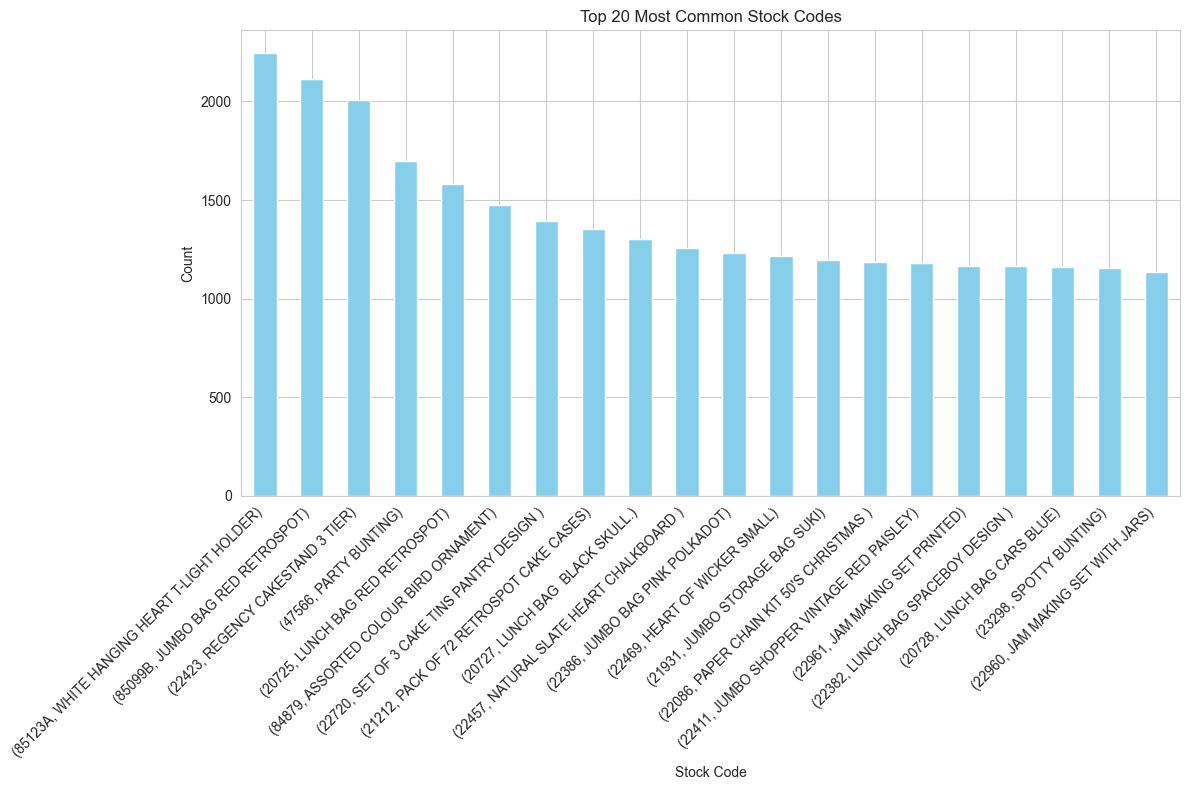

In [176]:
stockcode_counts = df_filtered_stockcode[["StockCode","Description"]].value_counts().head(20)


# Plotting a bar chart
plt.figure(figsize=(12, 8))
stockcode_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Stock Code')
plt.ylabel('Count')
plt.title('Top 20 Most Common Stock Codes')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 

plt.savefig('./plots/Top 20 Most Common Stock Codes.png')
plt.show()



Nhận xét: Từ biểu đồ chart có thể thấy các product như WHITE HANGING HEART T-LIGHT HOLDER (85123A) , JUMPER BAG RED RETROSPOT (85099B) hay REGENCY CAKESTAND 3 TIER (22423)... được mua với số lượng lớn nhất

### Xử lí cột InvoiceDate


In [177]:
df_filtered_stockcode['InvoiceDate'] = df_filtered_stockcode['InvoiceDate'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
                                       if '/' in x else pd.to_datetime(x, format='%d-%m-%Y %H:%M', errors='coerce'))
df_filtered_stockcode['InvoiceDate'] = df_filtered_stockcode['InvoiceDate'].dt.strftime('%d-%m-%Y %H:%M')



In [178]:
df_filtered_stockcode['InvoiceDate'] = pd.to_datetime(df_filtered_stockcode['InvoiceDate'], format='%d-%m-%Y %H:%M')
df_filtered_stockcode.info()


<class 'pandas.core.frame.DataFrame'>
Index: 523660 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    523660 non-null  int64         
 1   StockCode    523660 non-null  object        
 2   Description  523660 non-null  object        
 3   Quantity     523660 non-null  int64         
 4   InvoiceDate  523660 non-null  datetime64[ns]
 5   UnitPrice    523660 non-null  float64       
 6   CustomerID   523660 non-null  float64       
 7   Country      523660 non-null  object        
 8   Total        523660 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 40.0+ MB


In [179]:
# Extract time, month name, day name, and year
df_filtered_stockcode['Time'] = df_filtered_stockcode['InvoiceDate'].dt.time
df_filtered_stockcode['Month'] = df_filtered_stockcode['InvoiceDate'].dt.month_name()
df_filtered_stockcode['Day'] = df_filtered_stockcode['InvoiceDate'].dt.day_name()
df_filtered_stockcode['Year'] = df_filtered_stockcode['InvoiceDate'].dt.year

df_filtered_stockcode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08:26:00,December,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08:26:00,December,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12:50:00,December,Friday,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12:50:00,December,Friday,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12:50:00,December,Friday,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12:50:00,December,Friday,2011


### Xử lí cột Country


In [180]:
top_10_country = df_filtered_stockcode.Country.value_counts()
top_10_country

Country
United Kingdom          479979
Germany                   8644
France                    8085
EIRE                      7772
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1928
Portugal                  1455
Australia                 1183
Norway                    1049
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Unspecified                442
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     292
Hong Kong                  275
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57


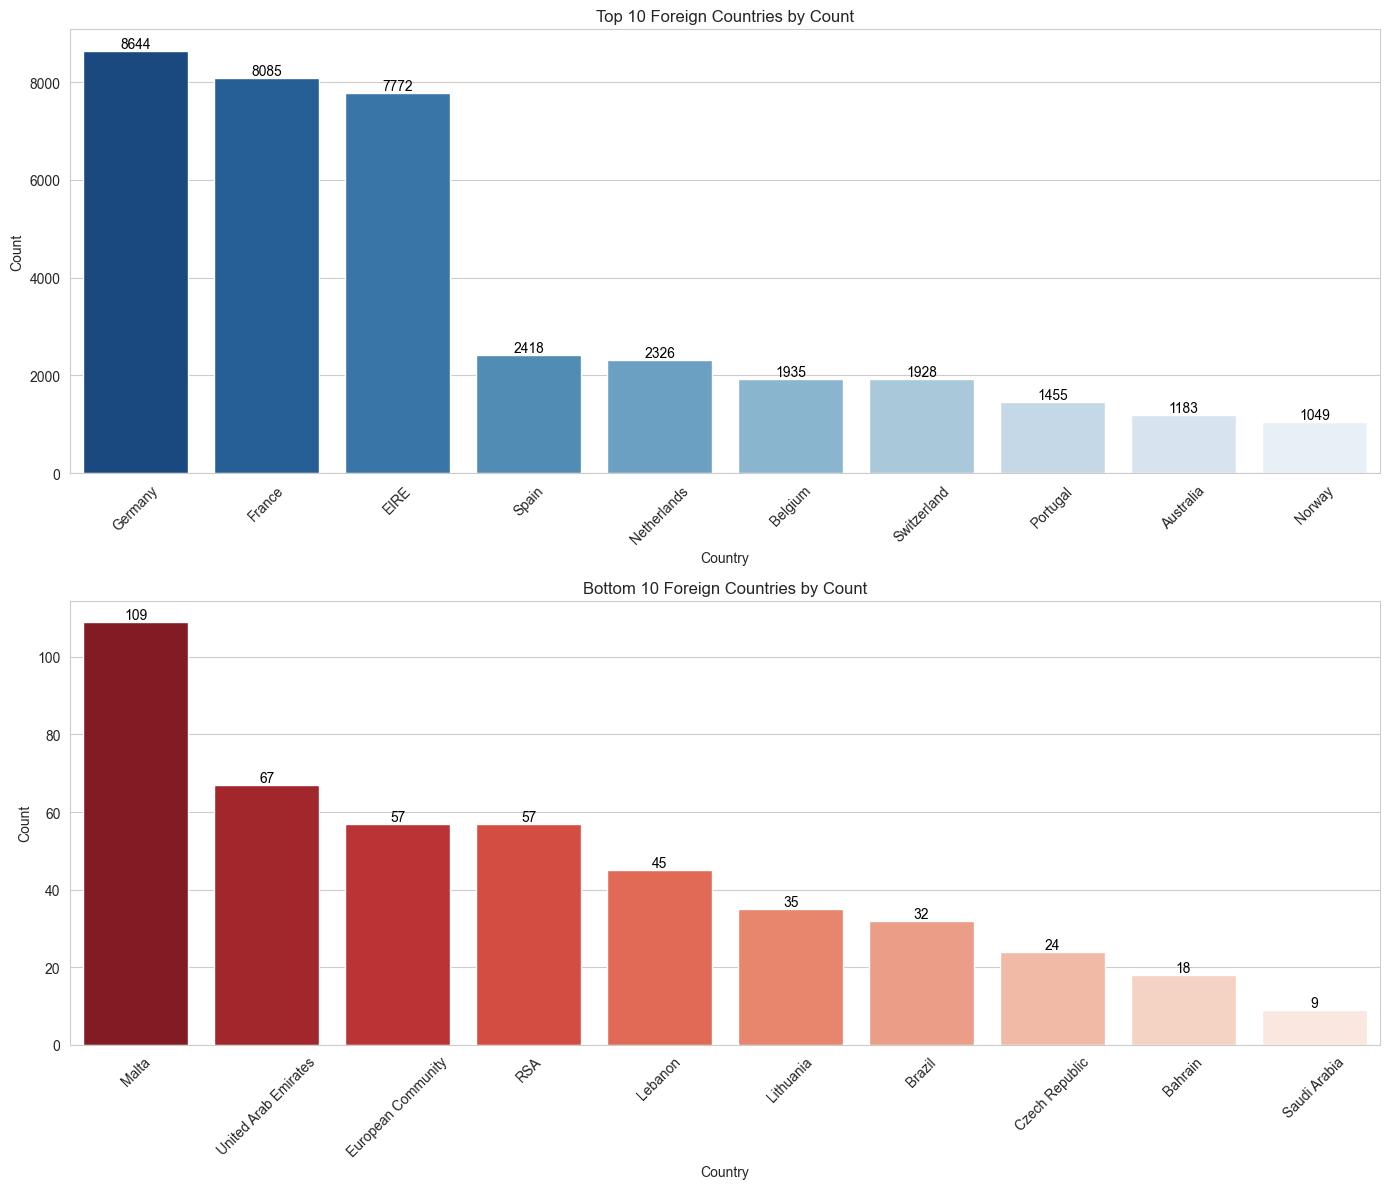

In [181]:
# Top 10 countries
top_10_country = df_filtered_stockcode['Country'].value_counts().iloc[1:11]
# Bottom 10 countries
bottom_10_country = df_filtered_stockcode['Country'].value_counts().tail(10)

plt.figure(figsize=(14, 12))

# Plotting top 10 countries
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=top_10_country.index, y=top_10_country.values, palette='Blues_r')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Top 10 Foreign Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  

# Plotting bottom 10 countries
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=bottom_10_country.index, y=bottom_10_country.values, palette='Reds_r')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Bottom 10 Foreign Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.savefig('./plots/Top 10 Bottom 10 Foreign Countries by Count.png')
plt.show()



Nhận xét: Vì đây là dữ liệu Online Retail đối với Nước Anh , nên sản phẩm được mua bởi đa số khách hàng ở nước này, ngoài ra còn có nhà buôn/bán lẻ trực tuyến ngoại quốc (Trong đó có Đức, Pháp , EIRE, ...). Các khách hàng đến từ các quốc gia như Czech Republic, Bahrain và Ả Rập xê út chiếm thị phần thấp nhất

In [182]:
df_filtered_stockcode.to_csv("./processed_data/online_retail_process.csv")

# 2. Insight dữ liệu

In [138]:
data = pd.read_csv("./processed_data/online_retail_process.csv",index_col=0)

In [121]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08:26:00,December,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08:26:00,December,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12:50:00,December,Friday,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12:50:00,December,Friday,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12:50:00,December,Friday,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12:50:00,December,Friday,2011


In [106]:
country_sales = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()
country_sales.head(10)

,Country,Quantity
0,United Kingdom,4705852
1,Netherlands,200834
2,EIRE,147170
3,Germany,118033
4,France,111226
5,Australia,84198
6,Sweden,36037
7,Switzerland,30516
8,Spain,27735
9,Japan,26016


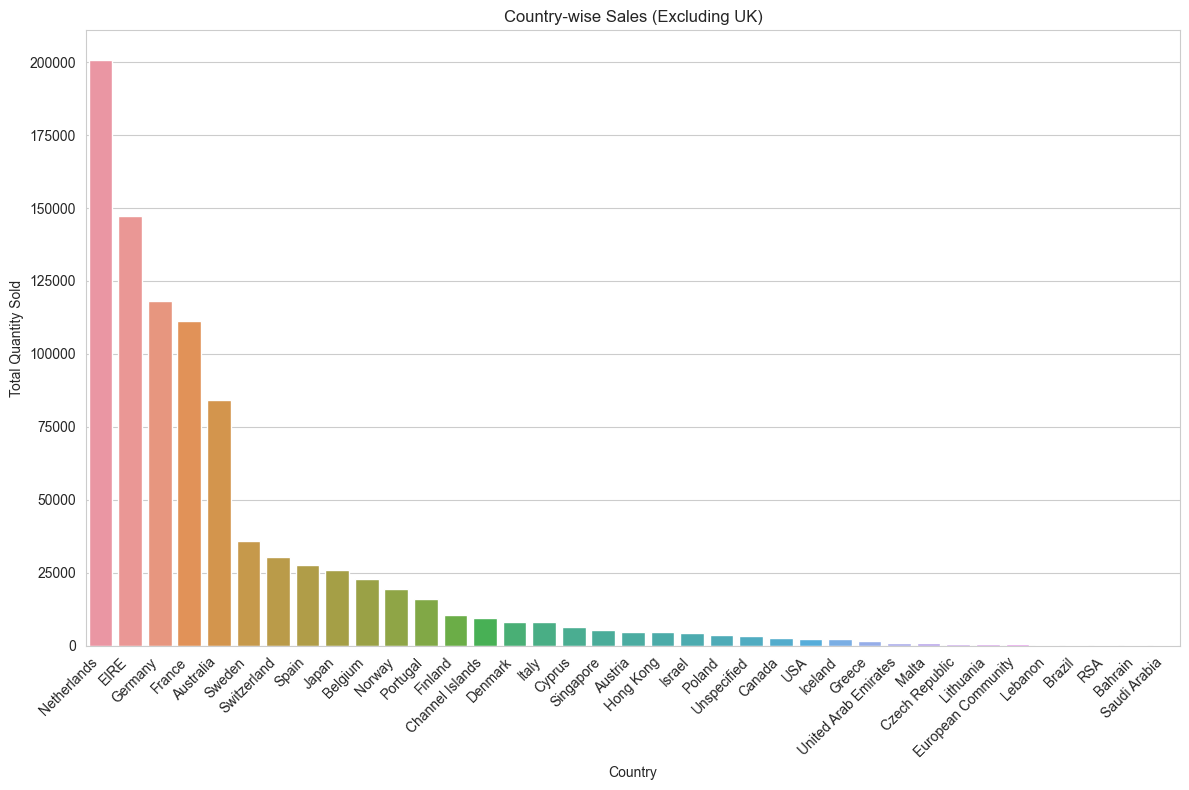

In [107]:
# Biểu đồ phân bố tổng số lượng hòa hóa mua theo các nước
# Exclude the country with the highest sales : UK
country_sales_subset = country_sales.iloc[1:]  

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x='Country', y='Quantity', data=country_sales_subset)
plt.title('Country-wise Sales (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('./plots/Country-wise Sales (Excluding UK).png')

plt.show()



Nhận xét: 
- Từ đồ thị Country-Wise có thể thấy được ngoài nước Anh nơi khách hàng (nhà buôn) mua với số lượng lớn nhất ( 4705852 item) , còn có những khách hàng (nhà buôn) đến từ các nước ngoài UK như Phần Lan, EIRE, Đức , Pháp ... 
- Những khách hàng đến từ các nước như RSA, Bahrain và Ả rập xê Út mua ít sản phẩm nhất

In [108]:
data[['UnitPrice','Description']].drop_duplicates().sort_values(ascending=False, by="UnitPrice")

,UnitPrice,Description
222680,649.5,PICNIC BASKET WICKER 60 PIECES
118769,295.0,VINTAGE BLUE KITCHEN CABINET
4989,295.0,VINTAGE RED KITCHEN CABINET
110843,195.0,LOVE SEAT ANTIQUE WHITE METAL
25168,175.0,LOVE SEAT ANTIQUE WHITE METAL
...,...,...
436428,0.0,BISCUIT TIN VINTAGE CHRISTMAS
344080,0.0,Amazon
432671,0.0,had been put aside
431590,0.0,wrongly marked


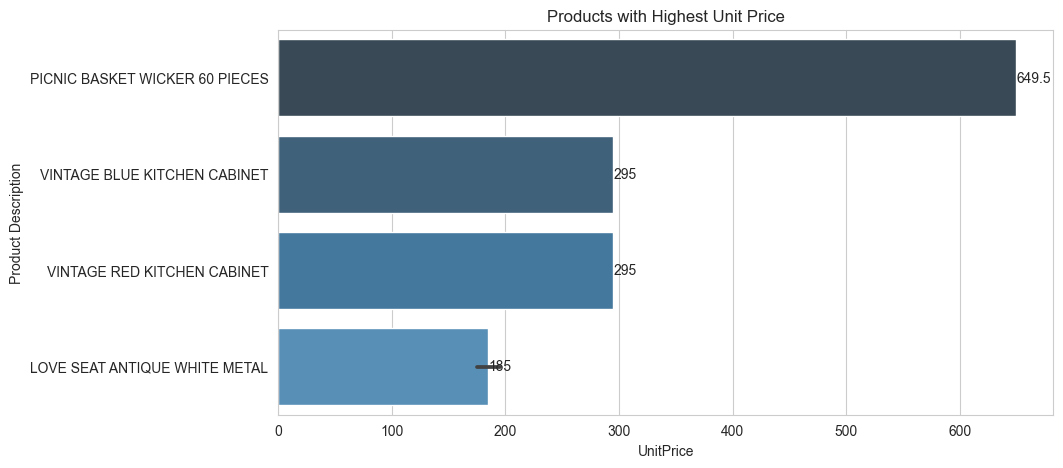

In [109]:
highest_unit_price = data[['UnitPrice','Description']].drop_duplicates().sort_values(ascending=False, by="UnitPrice")
highest_unit_price = highest_unit_price.head(5) 

Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))

ax =sns.barplot(y = 'Description' , x= 'UnitPrice' , data = highest_unit_price, palette = Palette)
ax.bar_label(ax.containers[0])
plt.title('Products with Highest Unit Price')
plt.ylabel('Product Description')

plt.savefig('./plots/Products with Highest Unit Price.png')

Nhận xét: Products có tên PICNIC BASKET WICKER 60 PIECES có giá thành trên 1 đơn vị cao nhất (649.5 sterling)

In [110]:
data[['Quantity','Description']].sort_values(ascending=False, by="Quantity")

,Quantity,Description
540421,80995,"PAPER CRAFT , LITTLE BIRDIE"
61619,74215,MEDIUM CERAMIC TOP STORAGE JAR
502122,12540,ASSTD DESIGN 3D PAPER STICKERS
74614,5568,Unknown
421632,4800,WORLD WAR 2 GLIDERS ASSTD DESIGNS
...,...,...
431468,1,REGENCY TEA PLATE PINK
245522,1,EDWARDIAN PARASOL BLACK
245521,1,SANDALWOOD FAN
431471,1,SET OF 3 REGENCY CAKE TINS


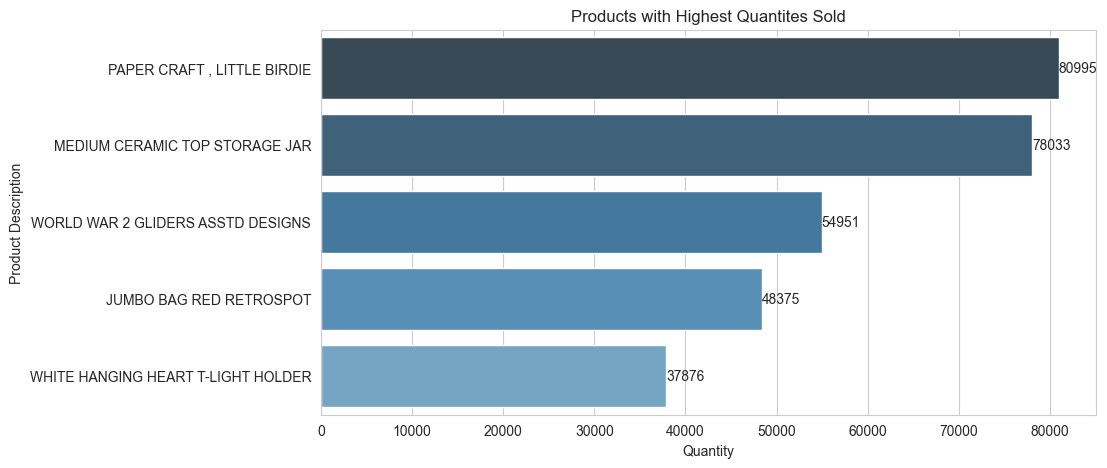

In [111]:
soldMost = data.groupby('Description')['Quantity'].sum().reset_index()
soldMost = soldMost.sort_values('Quantity',ascending = False ).head(5)

Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = soldMost, palette = Palette)
ax.bar_label(ax.containers[0])
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')

plt.savefig('./plots/Products with Highest Quantites Sold.png')

Nhận xét: Sản phẩm PAPER CRAFT , LITTLE BIRDIE có tổng số lượng bán ra cao nhất (80995 items) , tiếp theo là đến MEDIUM CERAMIC TOP STORAGE JAR (78033) ,...

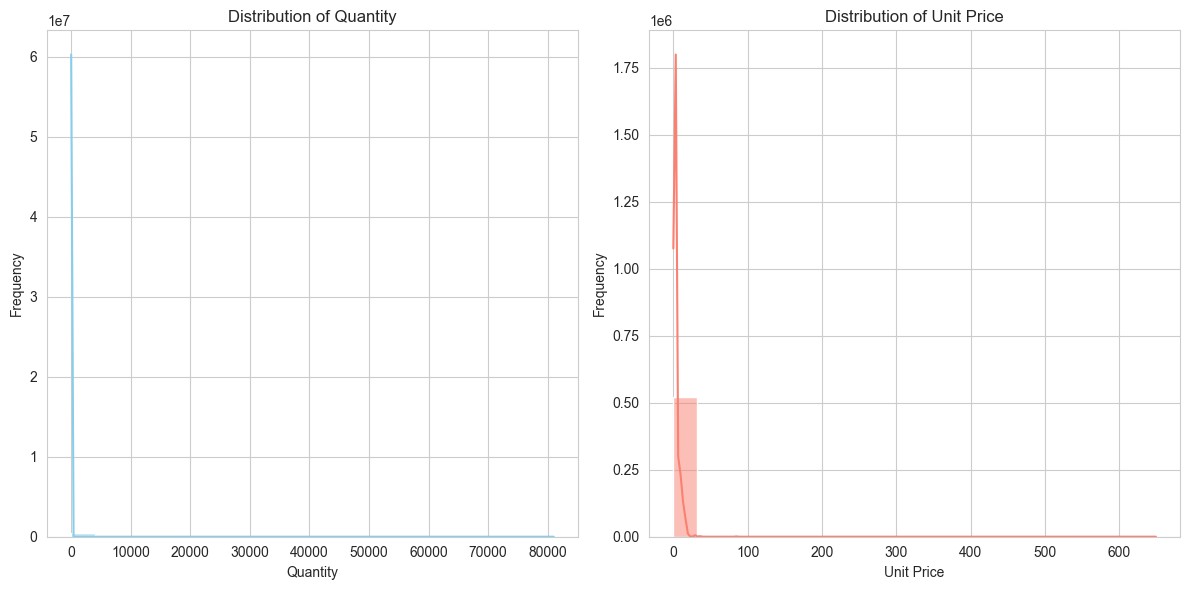

In [112]:
# Biểu đồ phân bố số lượng và unit price để biết thông tin quy mô đơn hàng và phạm vi giá thông thường.
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Quantity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(data['UnitPrice'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('./plots/Distribution of Unit Price and Quantity.png')

plt.show()




Nhận xét: Biểu đồ histogram đối với cả Quantity và Unit Price bị biased vì tồn tại rất nhiều dữ liệu outliers. Do đó cần phải xử lí outliers

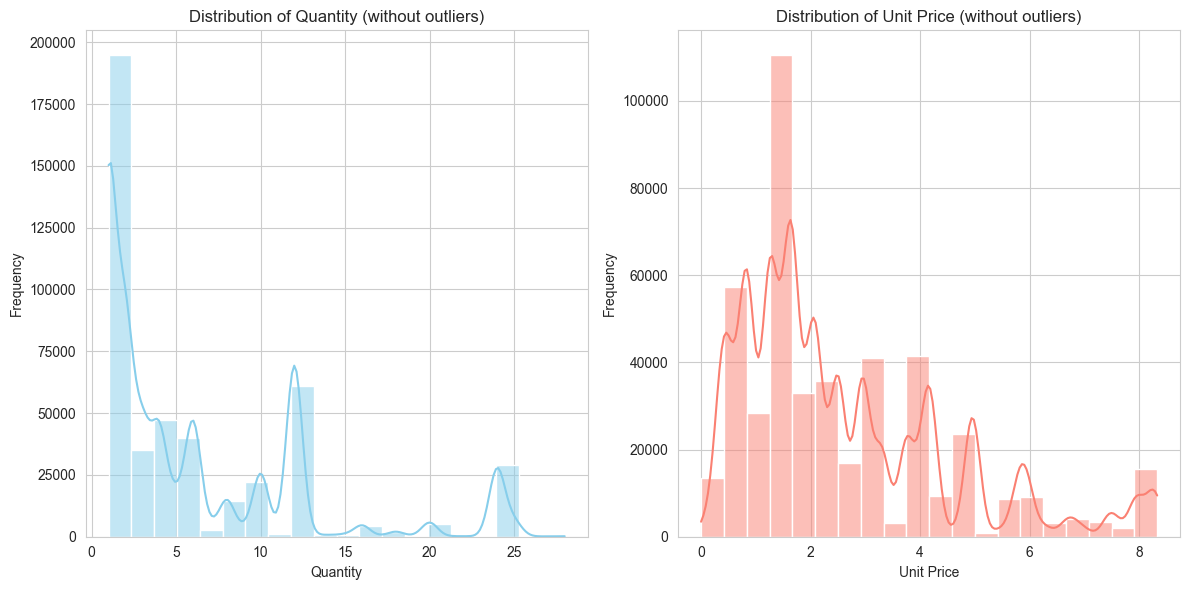

In [148]:
# Xử lí outlier
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_no_outliers = remove_outliers(data, 'Quantity')
df_no_outliers = remove_outliers(df_no_outliers, 'UnitPrice')

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['Quantity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Quantity (without outliers)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['UnitPrice'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Unit Price (without outliers)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig('./plots/Distribution of Unit Price and Quantity (without outliers).png')
plt.show()



Nhận xét: 
- Quantity: Mức độ phân bố của những sản phẩm với số lượng 0-2 đơn vị có tần số cao nhất, chứng tỏ đây là những mặt hàng được mua với số lượng thấp. Tuy nhiên cũng có những sản phẩm được mua với số lượng rất lớn như : PAPER CRAFT , LITTLE BIRDIE (80995 items)  hay MEDIUM CERAMIC TOP STORAGE JAR (74215 items), ... . Trên thực tế các mặt hàng như giấy thủ công, hay chai lọ thông thường được mua với số lượng khác cao
- Unit Price: Các sản phẩm nằm trong tầm giá 1-2 sterling chiếm phần đa số, có những sảm phẩm có giá trị  rất lớn như PICNIC BASKET WICKER 60 PIECES (649.5 sterling) hay VINTAGE BLUE KITCHEN CABINET (295.0 sterling)	nhưng thuộc nhóm các item có frequency thấp

In [114]:
data_select = data[['StockCode', 'Quantity', 'UnitPrice']]

In [115]:
top_products = data_select.groupby('StockCode').sum().reset_index().sort_values(by='Quantity',ascending=False).head(30)
all_prices = data_select.groupby('StockCode').mean()
top_products = pd.DataFrame({'StockCode':top_products.StockCode,'Quantity':top_products['Quantity'],'UnitPrice':[all_prices.loc[row[0]].UnitPrice for row in top_products.values]})


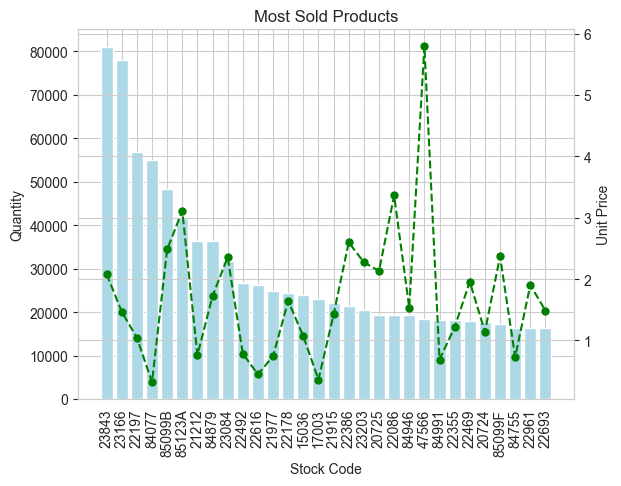

In [116]:
# Biểu đồ mối quan hệ giữa Quantity và Unit Price
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(top_products['StockCode'],top_products['Quantity'],color='lightblue')
ax2.plot(top_products['StockCode'],top_products['UnitPrice'],'g--o',markersize=5)
plt.title('Most Sold Products')
ax1.set_xlabel('Stock Code')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Unit Price')
ax1.set_xticklabels(top_products['StockCode'], rotation = 90);

plt.savefig('./plots/Most Sold Products by Quantity and Unit Price.png')

Nhận xét: Từ biểu đồ có thể thấy rằng, đối với những mặt hàng có giá thành trên 1 đơn vị càng lớn, số lượng mua càng ít và ngược lại

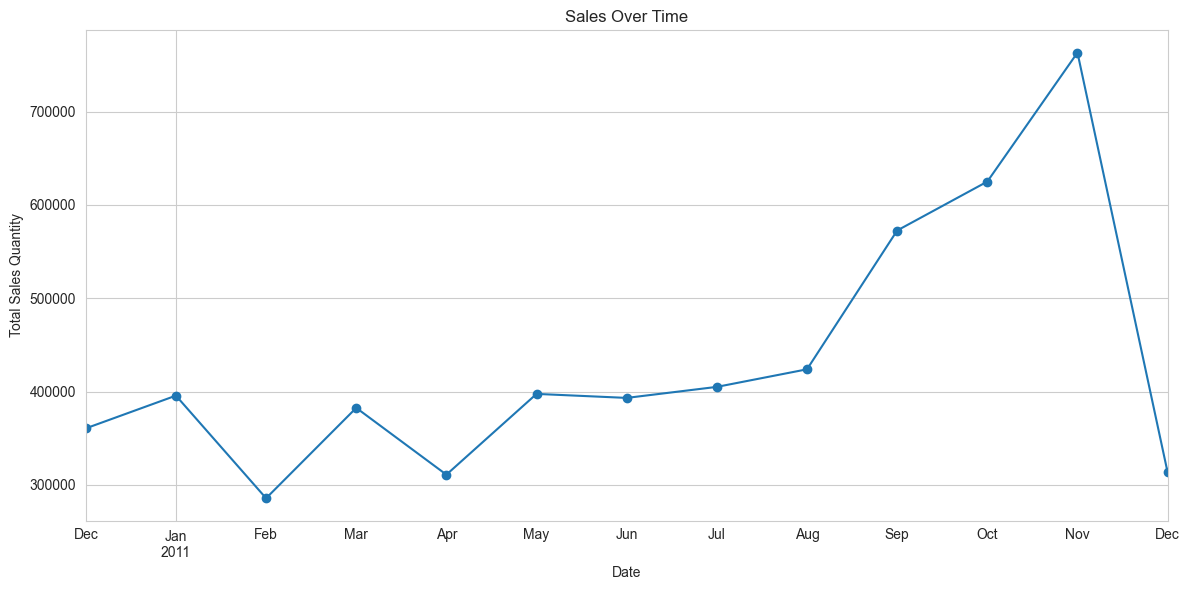

In [117]:
# Biểu đồ time Series cho toàn bộ tập data
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
sales_over_time = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()

# Plotting
plt.figure(figsize=(12, 6))
sales_over_time.plot(marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.tight_layout()

plt.savefig('./plots/Sales Over Time.png')
plt.show()



Nhận xét: Từ biểu đồ line Sales over time cho thấy năm 2011 tháng 11 có số lượng hàng hóa được bán ra cao nhất, tuy nhiên tháng 12 lại giảm mạnh. Tháng có doanh số bán hàng (tính theo số lượng - Quanlity) ít nhất là Tháng 2 và Tháng 4

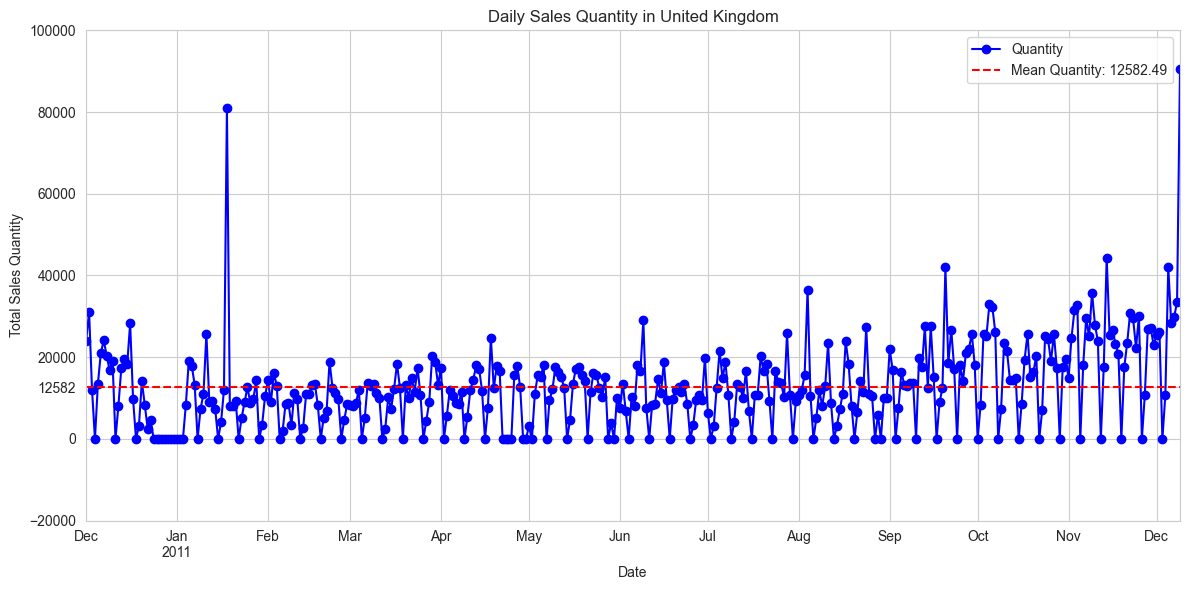

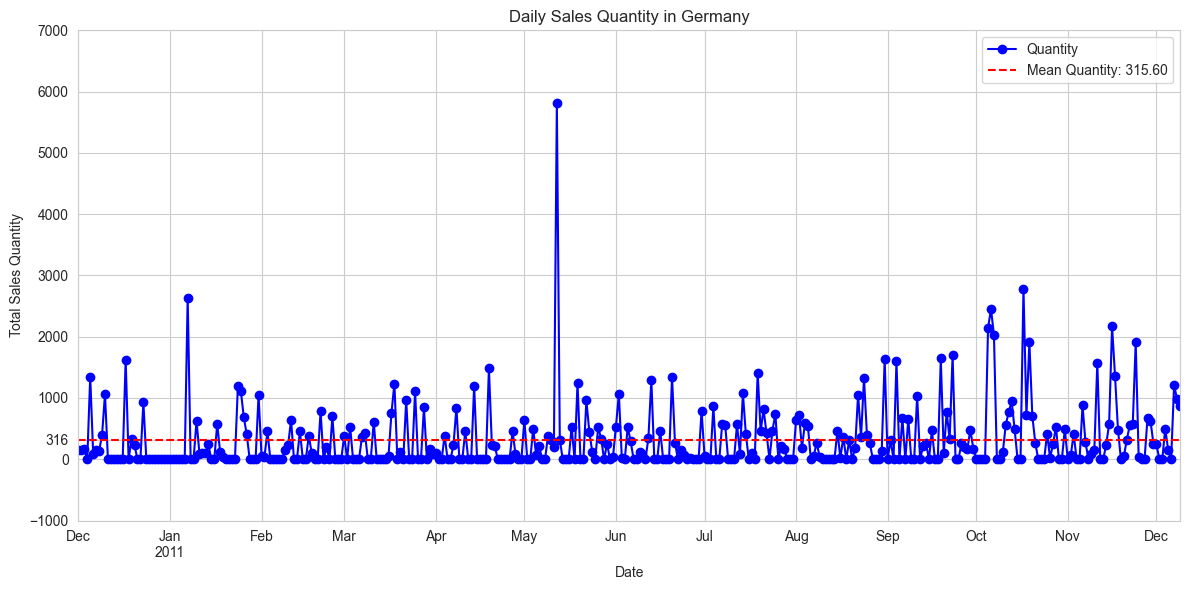

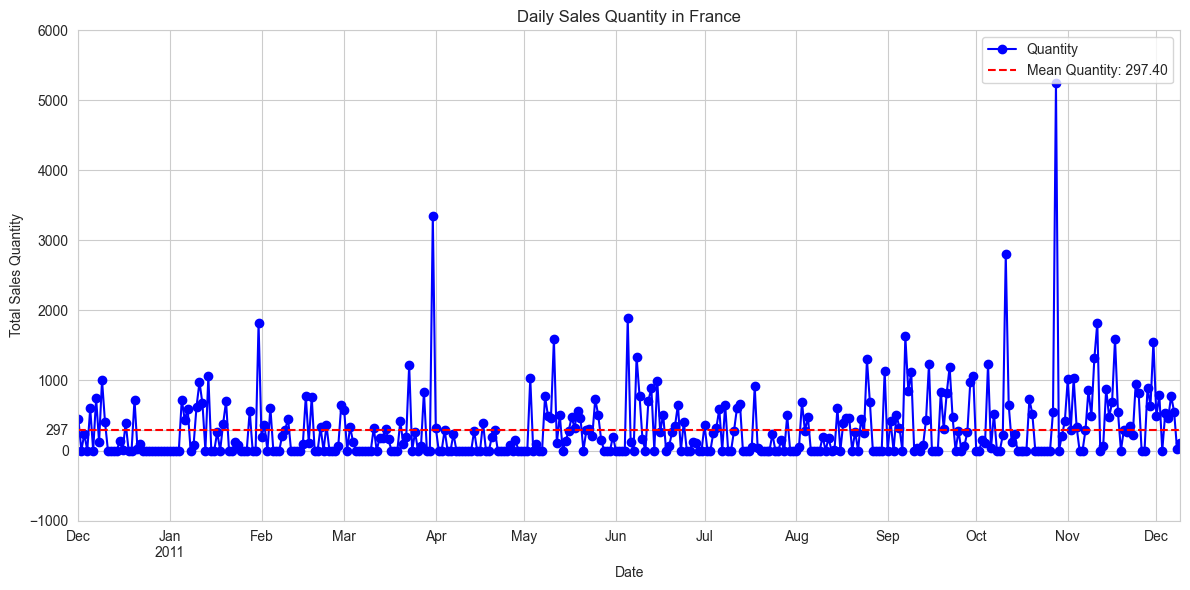

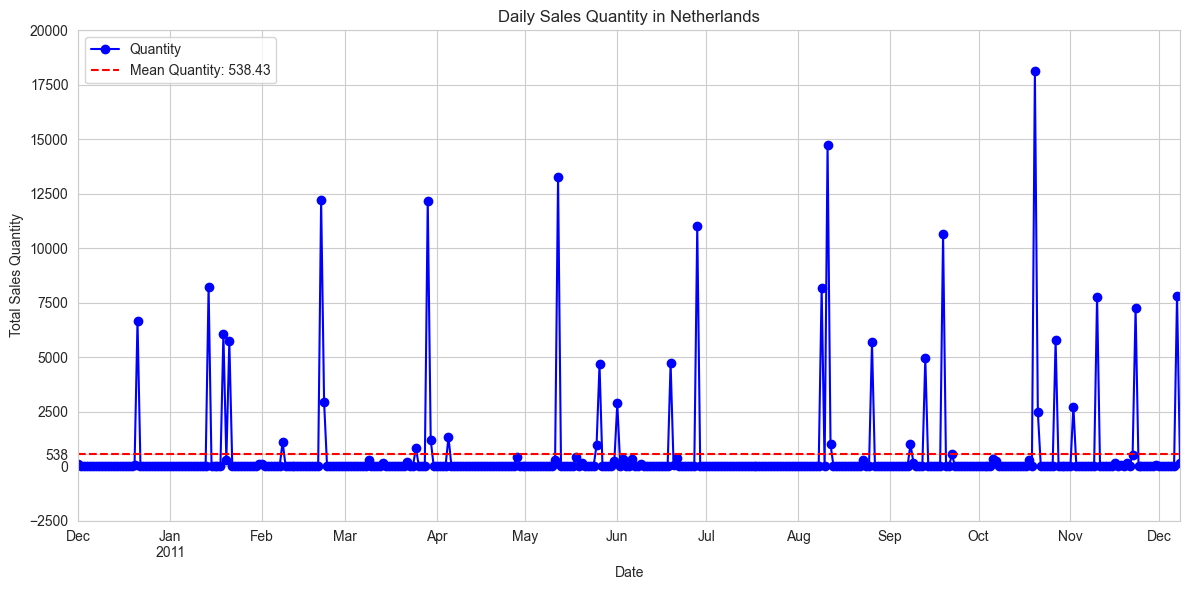

In [118]:
# Biểu đồ time Series cho top 4 country
countries = ['United Kingdom', 'Germany', 'France', 'Netherlands']

for country in countries:
  
    country_sales = data[data['Country'] == country]
    daily_sales = country_sales.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Quantity'].sum()
    mean_sales_quantity = daily_sales.mean()
    
    # Plot time series
    plt.figure(figsize=(12, 6))
    daily_sales.plot(marker='o', linestyle='-', color='b')
    plt.axhline(y=mean_sales_quantity, color='r', linestyle='--', label=f'Mean Quantity: {mean_sales_quantity:.2f}')
    plt.title(f'Daily Sales Quantity in {country}')
    plt.xlabel('Date')
    plt.ylabel('Total Sales Quantity')
    plt.yticks(list(plt.yticks()[0]) + [mean_sales_quantity])  # Add mean to y-axis ticks
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    
    plt.savefig(f'./plots/Daily Sales Quantity in {country}.png')
    plt.show()

Nhận xét: 2 trong số top 4 nước là Phần Lan và Pháp có đặc điểm mua sắm theo số lượng cao nhất trong khoảng từ Tháng 10 - Tháng 11, đúng theo biểu đồ timeseries cho tất cả các nước. Mật độ mua sắm bình quân theo số lượng ở UK vẫn cao nhất (Mean = 12582)

In [125]:
# Khảo sát tháng sales nhiều nhất 
data['Total'] = data['Quantity']*data['UnitPrice']
sales_2010 = data[data['Year']== 2010].groupby('Month')['Total'].sum().reset_index()
sales_2011 = data[data['Year']== 2011].groupby('Month')['Total'].sum().reset_index()

In [127]:
years = data['Year'].unique()
print(years)

[2010 2011]


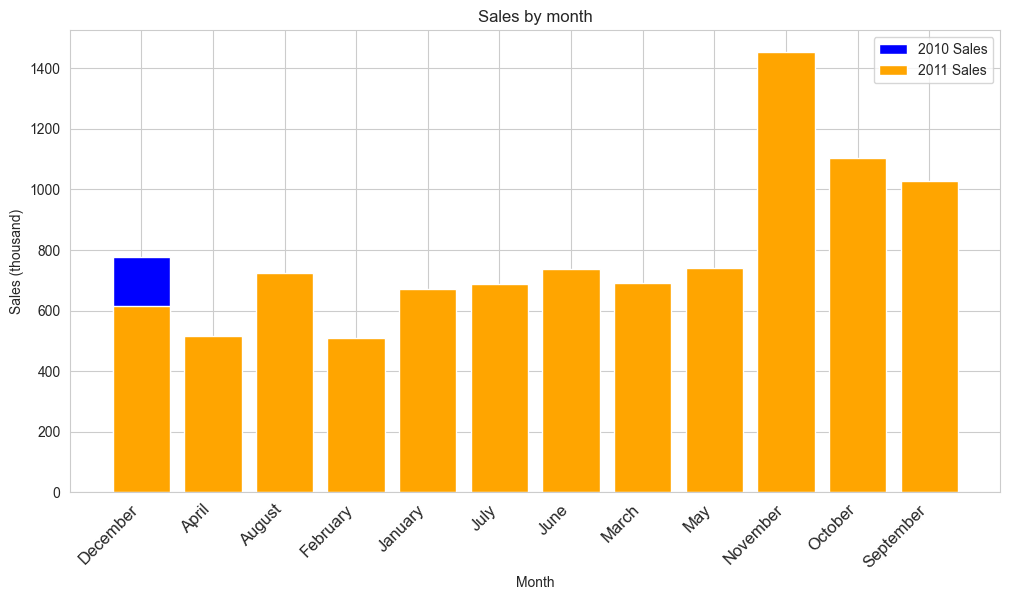

In [128]:
# Biểu đồ bar tổng total sale theo tháng của 2 năm
plt.figure(figsize=(12, 6))
plt.bar(sales_2010["Month"],sales_2010['Total']/1000, label='2010 Sales', color='blue')
plt.bar(sales_2011["Month"],sales_2011['Total']/1000, label='2011 Sales', color='orange')
plt.title(f'Sales by month')
plt.xticks(rotation = 'vertical',size = 12)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.savefig(f'./plots/Sales by month.png')
plt.show()



Nhận xét: Thấy rằng tháng có tổng doanh thu cao nhất trong năm 2011 là tháng 11, tiếp theo là tháng 10 và tháng 9, trong khi tháng 4 và tháng 2 có tổng doanh thu thấp nhất. Đối với năm 2010, dữ liệu chỉ có sẵn cho tháng 12

In [130]:
data.Day.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

Nhận xét: Không có dữ liệu Thứ 7 trong tuần

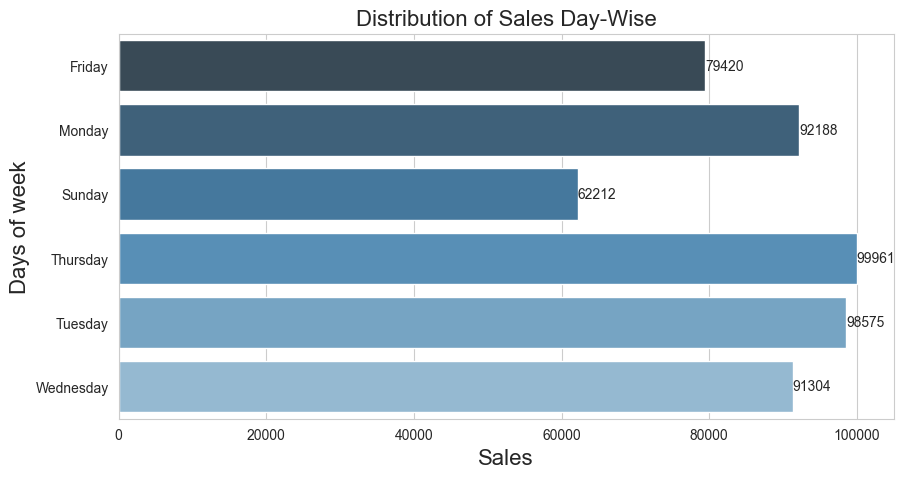

In [135]:
# Biểu đồ barchart sales theo ngày trong tuần
daySales = data.groupby('Day').count()[['InvoiceNo']].reset_index()
daySales.columns = ['Day','Sales']
daySales.sort_values(by='Day')


Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))

#Visualizing
ax =sns.barplot(y = 'Day' , x= 'Sales' , data = daySales, palette = Palette)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Days of week',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)


plt.savefig('./plots/Distribution of Sales Day-Wise.png')
plt.show()

Nhận xét: Khách hàng có xu hướng mua hàng hóa vào thứ 3 và thứ 5 là cao nhất. Chủ Nhật khách hàng ít mua hàng hóa nhất

In [136]:
data['Hour']=data['InvoiceDate'].dt.hour
BestTimeAdds = data.groupby('Hour').count().reset_index()

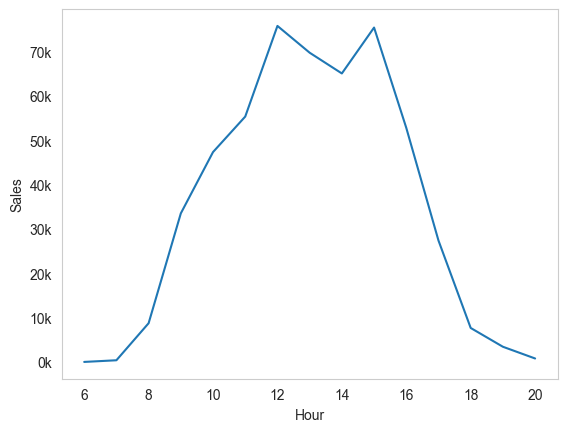

In [137]:
# Biểu đồ line Sales theo giờ trong ngày
from matplotlib.ticker import StrMethodFormatter
plt.plot(BestTimeAdds['Hour'],BestTimeAdds['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)


plt.savefig('./plots/Sales by dayhour.png')
plt.show()

Nhận xét: Theo biểu đồ, thời điểm lý tưởng để công ty thương mại điện tử chạy quảng cáo là từ 12 giờ trưa đến 3 giờ chiều vì khoảng thời gian này mang lại doanh thu cao nhất. Có thể điều này là do khách hàng thường có mặt trong giờ giải lao và sử dụng thiết bị di động hoặc máy tính trong những giờ này.

In [139]:
# Add numerical indices for months and days
month_indices = {month: idx + 1 for idx, month in enumerate(calendar.month_name[1:])}

data['Month_Index'] = data['Month'].map(month_indices)
data['Day_of_month_Index'] = pd.DatetimeIndex(data['InvoiceDate']).day



In [140]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Time,Month,Day,Year,Month_Index,Day_of_month_Index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08:26:00,December,Wednesday,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08:26:00,December,Wednesday,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,December,Wednesday,2010,12,1


In [141]:
data_new = data.drop(columns=['InvoiceDate'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523660 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           523660 non-null  int64  
 1   StockCode           523660 non-null  object 
 2   Description         523660 non-null  object 
 3   Quantity            523660 non-null  int64  
 4   UnitPrice           523660 non-null  float64
 5   CustomerID          523660 non-null  float64
 6   Country             523660 non-null  object 
 7   Total               523660 non-null  float64
 8   Time                523660 non-null  object 
 9   Month               523660 non-null  object 
 10  Day                 523660 non-null  object 
 11  Year                523660 non-null  int64  
 12  Month_Index         523660 non-null  int64  
 13  Day_of_month_Index  523660 non-null  int32  
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 57.9+ MB


In [142]:
day_data_df=data_new.groupby(['Month_Index','Day_of_month_Index']).sum().sort_values(['Month_Index','Day_of_month_Index']).reset_index()
day_data_df.drop(labels=['Quantity','UnitPrice','CustomerID'],axis=1,inplace=True)

In [143]:
day_data_arr = np.zeros((12,31))
for i in day_data_df.values:
    day_data_arr[i[0]-1][i[1]-1] = i[2]

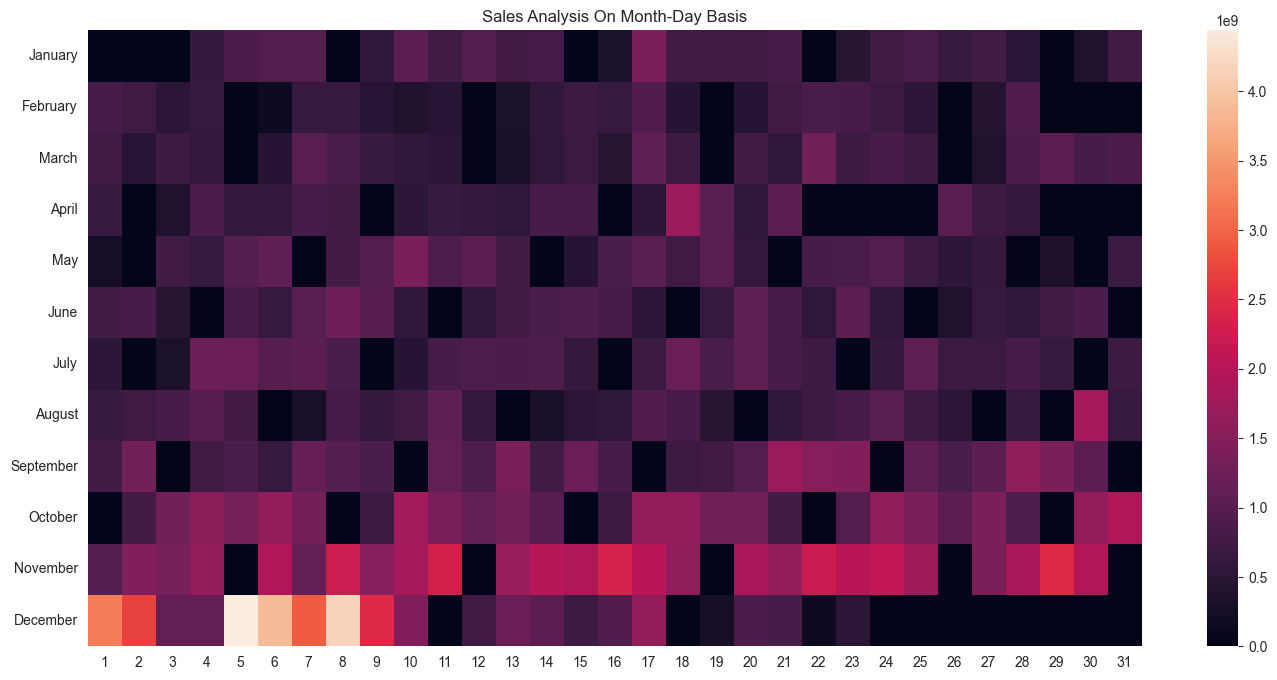

In [144]:

fig,ax = plt.subplots(figsize=(17,8))
plt.title('Sales Analysis On Month-Day Basis')
ax.set_xlabel('Days')
colormap = sns.color_palette("Greens")
sns.heatmap(day_data_arr,xticklabels=range(1,32),yticklabels=[calendar.month_name[i] for i in range(1,13)],label='Month',ax=ax);

plt.savefig('./plots/Sales Analysis On Month-Day Basis.png')

Nhận xét: Từ biểu đồ heatmap có thể thấy từ ngày 5-8 trong tháng 12 , sales đạt giá trị cao nhất trong năm

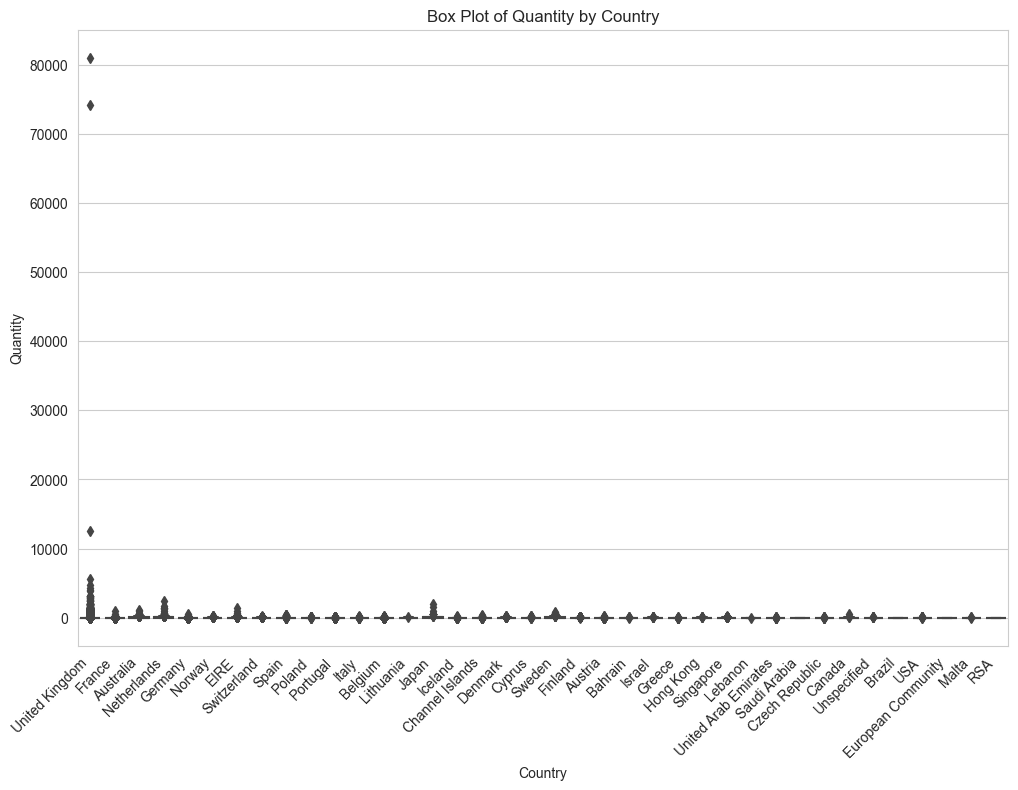

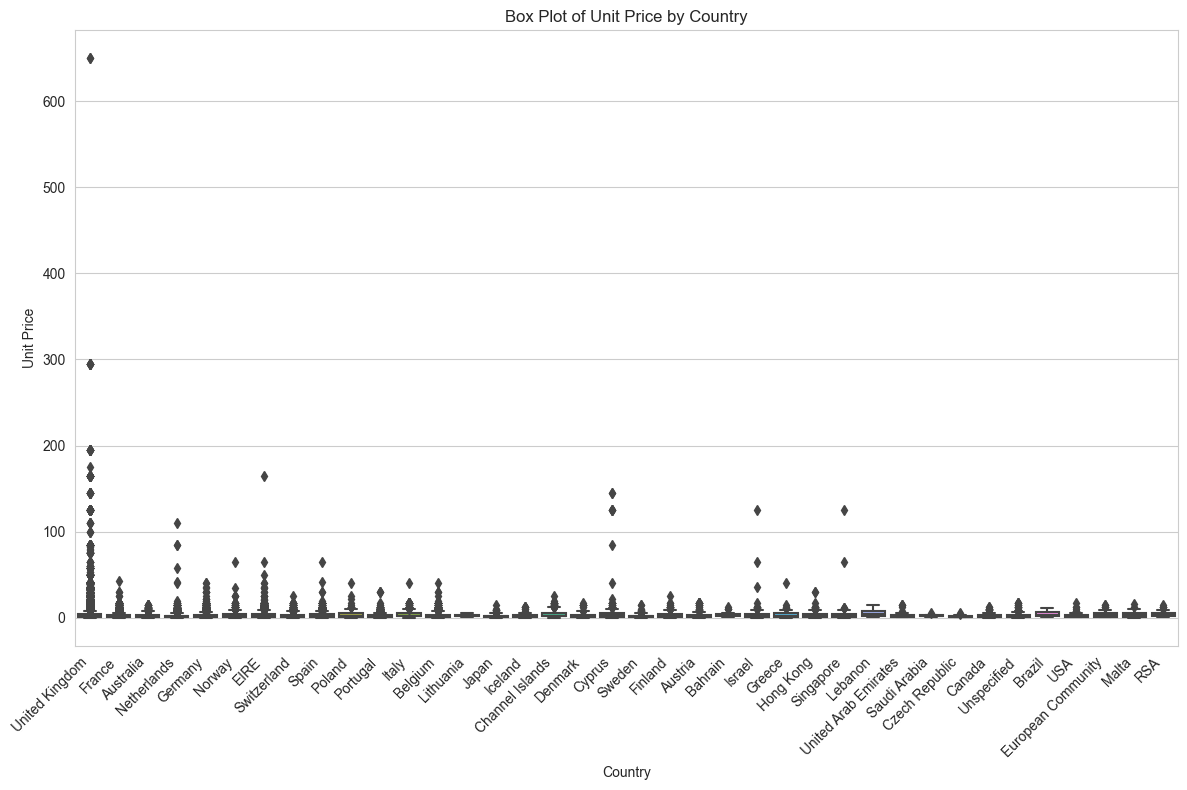

In [145]:
# Biểu đồ boxplot Quantity và UnitPrice theo Country
# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Quantity', data=df_filtered_stockcode)
plt.title('Box Plot of Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')

plt.savefig('./plots/Box Plot of Quantity by Country.png')



plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='UnitPrice', data=df_filtered_stockcode)
plt.title('Box Plot of Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')

plt.savefig('./plots/Box Plot of Unit Price by Country.png')

plt.tight_layout()
plt.show()

Nhận xét: Từ biểu đồ boxplot có thể thấy, ở nước Anh khách hàng thường mua hàng hóa với đơn giá khá cao và số lượng lớn, số liệu này cũng được thấy tương tự ở Netherlands nhưng thấp hơn nhiều. 

In [146]:
# Khảo sát những Products thường được bán chung với nhau
soldTogether = data.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()
soldTogether 

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
20533,581583,"LUNCH BAG RED RETROSPOT , 6 CHOCOLATE LOVE HEA..."
20534,581584,"RED FLOCK LOVE HEART PHOTO FRAME , 6 CHOCOLATE..."
20535,581585,"BLACK TEA TOWEL CLASSIC DESIGN , ASSORTED BOTT..."
20536,581586,"LARGE CAKE STAND HANGING STRAWBERY , SET OF 3..."


In [147]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in soldTogether['Description']:
    row_list = row.split(",")
    #item mostly sold together , here it shows 2 items sold together
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 744
(' KEY FOB ', ' BACK DOOR  ') 546
(' KEY FOB ', ' SHED ') 512
(' KEY FOB ', ' FRONT  DOOR  ') 455
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 444
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 441
('COFFEE', 'SUGAR ') 431
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' SET 3 RETROSPOT TEA', 'SUGAR ') 413
(' LUNCH BAG RED RETROSPOT ', ' LUNCH BAG  BLACK SKULL. ') 393


Nhận xét: Chúng ta có thể thấy Key Fob hầu hết được bán kèm theo cặp Key Fob phụ hoặc có Back Door hoặc có Shed ...=> có thể đề xuất khách hàng mua những mặt hàng theo pair  => nâng cao doanh số bán hàng.